<a href="https://colab.research.google.com/github/skarot/MachineLearning/blob/main/SVMRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## Logistic Regression

### Import Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

### Download data

In [93]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

--2022-04-28 15:52:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: ‘cell_samples.csv.2’

cell_samples.csv.2  100%[===================>]  19.51K  --.-KB/s    in 0s      

2022-04-28 15:52:49 (249 MB/s) - ‘cell_samples.csv.2’ saved [19975/19975]



In [94]:
df= pd.read_csv("cell_samples.csv")

In [95]:
df.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Check datatype of target column and change to integer as required by the algorithm

In [96]:
df['Class'].dtype

dtype('int64')

### Select X and Y

In [97]:
y = np.asarray(df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [98]:
X = np.asarray(df[['ID','Clump','MargAdh','NormNucl']])
X[0:5]

array([[1000025,       5,       1,       1],
       [1002945,       5,       5,       2],
       [1015425,       3,       1,       1],
       [1016277,       6,       1,       7],
       [1017023,       4,       3,       1]])

### Normalise data

In [99]:
from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.12,  0.21, -0.63, -0.61],
       [-0.11,  0.21,  0.77, -0.28],
       [-0.09, -0.5 , -0.63, -0.61],
       [-0.09,  0.56, -0.63,  1.35],
       [-0.09, -0.15,  0.07, -0.61]])

### Train Test split

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)

## Modeling (Logistic regression with SVM)

In [101]:
from sklearn import svm
SVMR = svm.SVC(kernel = 'linear').fit(X_train, y_train)
SVMR

SVC(kernel='linear')

### Predict the classes

In [102]:
yhat = SVMR.predict(X_test)
yhat

array([4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 4, 2,
       2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 4])

### Predict Probablity of X belonging to each class

## Evaluation

### Jaccard Index

In [105]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat,pos_label = 4)

0.8461538461538461

### Confusion Matrix

In [108]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[2,4]))


[[88  0]
 [ 8 44]]


Confusion matrix, without normalization
[[88  0]
 [ 8 44]]


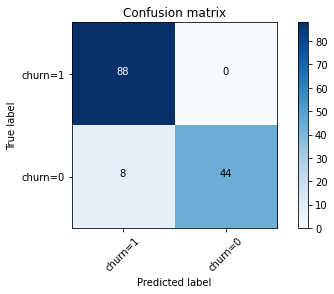

In [109]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [110]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           2       0.92      1.00      0.96        88
           4       1.00      0.85      0.92        52

    accuracy                           0.94       140
   macro avg       0.96      0.92      0.94       140
weighted avg       0.95      0.94      0.94       140

